# Module 6: Advanced Methods

This module is a bit shorter, as we'll only briefly look at Machine Learning (ML), and how you can apply it to archaeological data. In the first section we will use the spearheads data set again, and try to predict whether a spearhead is bronze or iron, based on the other properties of the spearhead. This might not be a very useful application of Machine Learning, but it's just to show you what ML looks like in Python, and how easy it is to train your own model. At the end of the module, you'll try and train your own model to predict pottery types.


## Spearheads material prediction

Once again, we need to import some libraries!

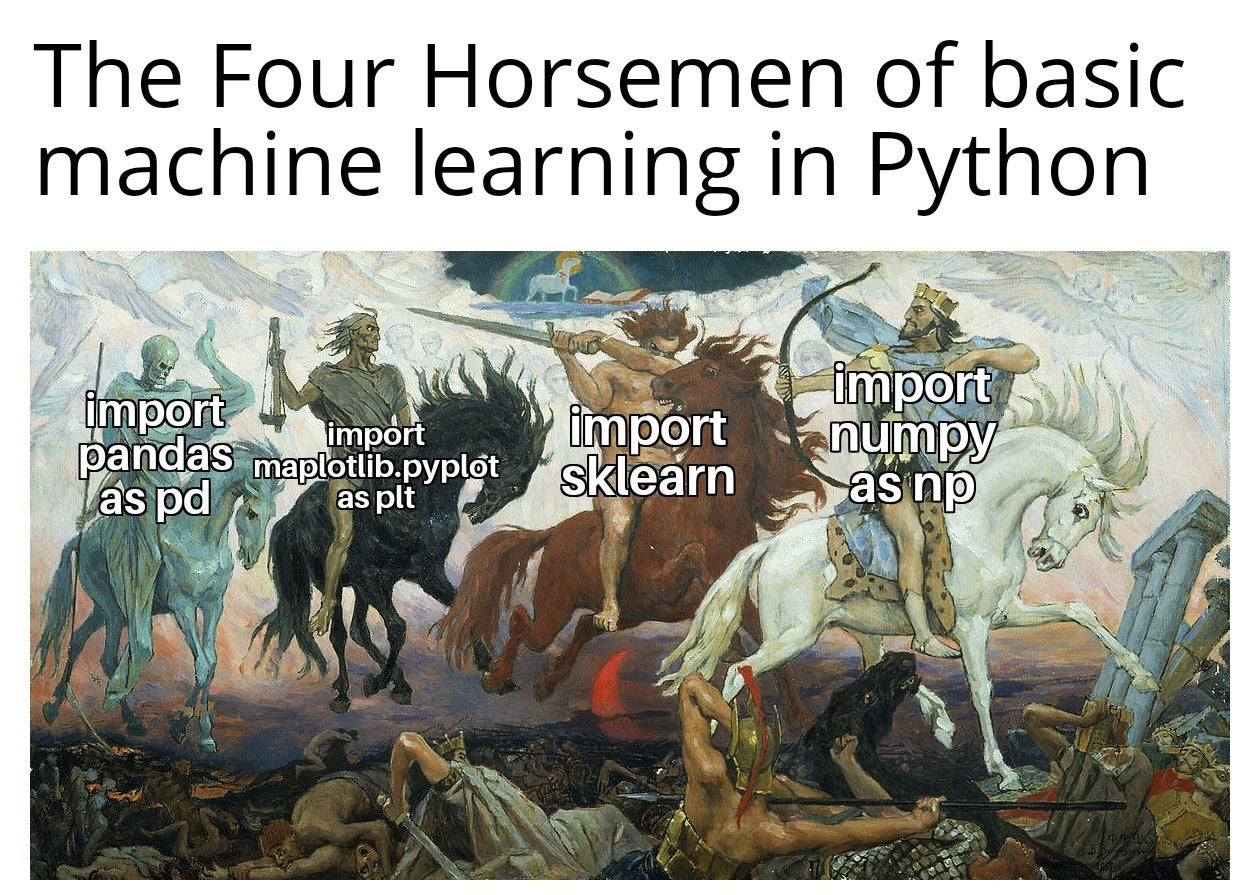

Don't worry about understanding everything being imported here.

In [102]:
# import required libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
import numpy as np
import seaborn as sns

Now let's import the spearheads CSV and inspect the data

In [103]:
# load spearheads data
spearheads = pd.read_csv('../data/spearheads.csv')

# have a quick look at the data again
spearheads

,num,mat,con,loo,peg,cond,date,maxle,socle,maxwi,upsoc,losoc,mawit,weight
0,1,2,3,1,2,3,300,12.4,3.1,3.6,1.0,1.7,6.2,167.0
1,2,2,3,1,2,4,450,22.6,7.8,4.3,1.3,1.6,11.3,342.1
2,3,2,3,1,2,4,400,17.9,5.2,4.1,1.7,2.0,7.5,322.9
3,5,2,3,1,1,3,350,16.8,6.6,5.7,1.1,1.7,7.0,358.1
4,6,2,3,1,2,3,400,13.3,3.1,4.1,1.6,1.9,5.6,227.9
5,7,2,3,1,2,2,450,14.1,5.8,5.8,1.2,1.8,6.8,323.8
6,9,2,2,1,2,4,150,22.5,9.2,6.2,1.3,2.0,13.1,613.8
7,10,2,1,1,2,3,300,16.9,4.5,3.6,1.4,1.9,5.2,254.3
8,11,2,1,1,2,2,50,19.1,4.6,4.1,1.5,1.8,10.6,310.1
9,12,2,1,1,2,3,100,25.8,8.6,4.7,1.4,1.6,12.7,426.8


Next, we need to define what column to use as the label to predict (in our case 'mat', the material of the spearhead), and which columns to use as features. The ML model will use the features to try and predict labels. For now, let's just use the condition ('cond') and whether or not the spearhead has a loop and/or peg ('loo' / 'peg').

In ML, the label column is often called `y`, while the features are called `X`:

In [104]:
# set the y (the label we want to predict)
y = spearheads['mat']

# set the X (the features we want the algorithm to learn from)
X = spearheads[['loo','peg','cond']]

###################################
# We can also use all columns, except 'mat'. Come back to this later! 
# X = spearheads.drop('mat', axis=1)


Now we have defined what to use as labels and features, it is time to make a test/train split in our data. We'll use a built-in function of `sklearn` to do this for us. We set `test_size` to 0.2, meaning that 20% of our data should be used as the test set. Then we inspect what the `X` and `y` look like:

In [105]:
# use sklearn to automatically make a test/train set from our data, using a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# check what that looks like
print("train set features:")
print(X_train)

print("train set labels:")
print(y_train)


train set features:
    loo  peg  cond
3     1    1     3
30    1    2     1
26    1    2     2
7     1    2     3
34    1    2     1
6     1    2     4
23    2    1     1
31    1    2     1
17    1    1     3
4     1    2     3
10    1    2     2
2     1    2     4
18    2    1     2
33    2    1     2
21    2    1     1
27    2    1     2
20    2    1     1
8     1    2     2
22    2    1     2
35    2    1     2
12    1    2     2
15    1    2     3
16    1    2     2
37    2    1     2
19    1    2     2
13    1    2     2
5     1    2     2
36    2    2     3
14    1    2     2
29    1    2     2
train set labels:
3     2
30    1
26    1
7     2
34    1
6     2
23    1
31    1
17    2
4     2
10    2
2     2
18    1
33    1
21    1
27    1
20    1
8     2
22    1
35    1
12    2
15    2
16    2
37    1
19    1
13    2
5     2
36    1
14    2
29    1
Name: mat, dtype: int64


Ok, so the data has been put in a random order, and we have the features (loo, peg, cond) seperately from the labels (mat).

Now the data is prepared, we need to load a classifier from `sklearn`, and then train that classifier on our data. We'll use an SVM (Support Vector Machine), which is a very powerful, but relatively light-weight ML algorithm.

In [106]:
# create the machine learning classifier object
svmClassifier = svm.SVC(kernel='linear') 

# train the classifier with our train data
svmClassifier.fit(X_train, y_train)

SVC(kernel='linear')

Give yourself a pat on the back, you've just trained your first Machine Learning model! The SVM is now ready to predict labels on data it hasn't seen yet: our test set.

In [107]:
# use the trained model to predict labels for our test set
y_pred_test = svmClassifier.predict(X_test)

We now have the labels that the model predicted, so we can compare these to the actual true labels (`y_test`), and calculate performance metrics. We start with the F1 score:

In [108]:
# use sklearn to calculate f1 score
print('F1 score on test data:')
print(f1_score(y_test, y_pred_test))

F1 score on test data:
0.8571428571428571


The F1 score is 0.857, which means it is about 86% accurate. That's pretty good, especially for such a small data set!

We can also ask `sklearn` to show a full report of the precision, recall, and F1 for each category, using the `classification_report` function:

In [109]:
# use sklearn to view full classification report
print('Classification report:')
print(classification_report(y_test,y_pred_test))


Classification report:
              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



We can see the F1 score is almost the same for category 1 and 2 (bronze and iron), that's good news, as it means the model is equally good at predicting both labels.

Now let's visualise which features (columns) are most important for the SVM to make a decision on which label to predict. You don't need to understand exactly what's going on here, but basically we are making a DataFrame Series object from the SVM coefficients (the relative weight of each feature), taking the 10 largest feature weights, then plotting them as a bar chart ('barh').

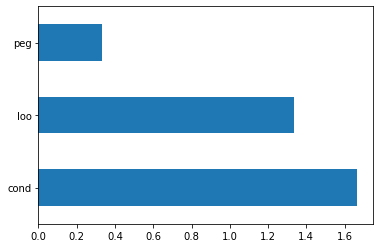

In [110]:
# visualise the most important features (columns) for the classifier
pd.Series(abs(svmClassifier.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')


So it looks like 'cond' is the most important feature! If you remember from previous modules, the condition was pretty different between bronze and iron, so this makes sense. The ML model tries to find which feature is the most different between classes, and uses that as the main feature.

We can also plot a so-called confusion matrix, which is technically a Seaborn heatmap. A confusion matrix shows for each category, how often the model has predicted the correct or incorrect category.

[[3 1]
 [0 4]]


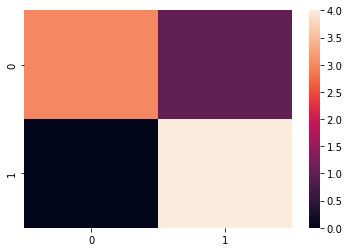

In [111]:
# make confusion table
confusion = confusion_matrix(y_test,y_pred_test)
print(confusion)

# make heatmap
sns.heatmap(confusion)

# display the plot
plt.show()

When dealing with just 2 categories, this isn't very useful to see, but in the section below this will be more enlightening!

Now go back a couple of cells to where we define `y` and `X`, and change the columns used as features to ones you think are useful. Then re-run all the cells above so you can see the difference in performance, is it working better or worse? 

(There's also a commented out line of code that will use all columns by dropping just the label column ('mat'), just delete the hashtag if you want to try that instead.) 

Once you're done, continue below with the final exercise.

## Pottery exercise: predict shape class

Now let's see if you can train your own model from scratch, using the above code as an example! We'll use the pottery CSV, and we'll try to predict the shape_class of the pottery. This is normally done by experts looking at the pottery and making a judgement on which class the pottery is, but this is difficult to learn and requires a lot of practice. Let's see if ML can come to the rescue!

First, we'll load and prepare the data. You don't need to understand exactly what's going on here, but basically we are replacing strings with integers, and filling in empty cells in the dataframe, because SVM can't deal with strings and empty values. We also remove (drop) the vessel_id column, as that column is different for each pot, so it's not useful to include as a feature.

In [112]:
# load  data
pottery = pd.read_csv('../data/pottery.csv')

# replace string categories with ints
pottery['rim_orient'] = pd.factorize(pottery['rim_orient'])[0] + 1
pottery['additional_elem'] = pd.factorize(pottery['additional_elem'])[0] + 1

# fill NaN's with zeroes
pottery = pottery.fillna(0)

# remove vessel_id column
pottery = pottery.drop('vessel_id', axis=1)

# show dataframe
pottery

,shape_class,rim_orient,rim_profile,base_type,additional_elem,height,opening_diam,base_diam,neck_diam,belly_diam,neck_height,belly_height,H-Bd,Bd-Rd,Bd-Nd,H-Bh,H-Nh,Bd-BaD
0,N,1,9,2,1,6.90,4.8,0.8,3.84,6.67,5.88,2.95,1.03,1.39,1.74,2.34,1.17,8.34
1,N,1,9,2,1,12.10,9.3,2.2,8.14,12.12,10.48,6.00,1.00,1.30,1.49,2.02,1.15,5.51
2,C,2,3,4,1,7.40,17.0,4.5,17.00,17.00,7.40,7.40,0.44,1.00,1.00,1.00,1.00,3.78
3,E,1,1,4,1,6.35,12.3,5.6,12.30,12.30,6.35,6.35,0.52,1.00,1.00,1.00,1.00,2.20
4,K,1,13,4,2,9.60,5.4,2.2,3.18,8.58,7.69,4.15,1.12,1.59,2.70,2.31,1.25,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,K,1,3,2,1,15.50,11.0,0.0,8.79,18.75,13.21,7.24,0.83,1.70,2.13,2.14,1.17,0.00
492,K,1,3,2,1,14.50,12.5,0.0,9.78,17.88,12.43,6.65,0.81,1.43,1.83,2.18,1.17,0.00
493,E,3,7,4,1,5.00,13.3,3.5,13.30,13.90,5.00,3.80,0.36,1.05,1.05,1.32,1.00,3.97
494,C,2,7,4,1,4.80,15.9,5.0,15.90,15.90,4.80,4.80,0.30,1.00,1.00,1.00,1.00,3.18


Now it's your turn! Using the example code of the spearheads above, do the following:

- Set the labels to predict (`y`) as the shape_class column
- Set the features (`X`). You can choose to include all columns, or just the columns that you think are informative
- Create the test/train split
- Create the classifier object (SVM)
- Train the classifier on the train data
- Predict labels on the test data, using the trained model
- Print the classification_report
- Show the most important features in a bar chart
- Optional: make a confusion matrix and display it as a heatmap

F1 score on test data
0.83
              precision    recall  f1-score   support

           C       1.00      0.50      0.67         2
           E       0.94      0.92      0.93        37
           G       0.86      0.95      0.90        19
           H       1.00      0.75      0.86         4
           K       0.75      0.75      0.75         4
           N       0.80      0.57      0.67         7
           P       0.74      0.78      0.76        18
           R       0.62      0.71      0.67         7
           T       0.33      0.50      0.40         2

    accuracy                           0.83       100
   macro avg       0.78      0.71      0.73       100
weighted avg       0.84      0.83      0.83       100



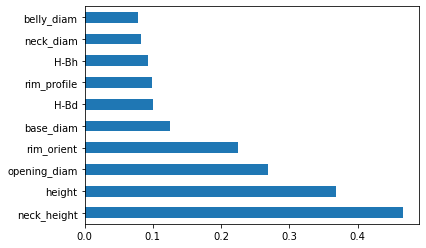

In [113]:
# your code goes here:

# set the y (the label we want to predict)
y = pottery['shape_class']

# set the X (the features we want the algorithm to learn from)
X = pottery.drop('shape_class', axis=1)

# use sklearn to automatically make a test/train set from our data, using a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# create the machine learning classifier object, we use an SVM (Support Vector Machine)
svmClassifier = svm.SVC(kernel='linear') 

# train the classifier with our train data
svmClassifier.fit(X_train, y_train)

# predict labels for our test set
y_pred_test = svmClassifier.predict(X_test)

# use sklearn to calculate f1 score
print('F1 score on test data')
print(f1_score(y_test, y_pred_test, average='micro'))

# show class report
print(classification_report(y_test,y_pred_test))


# visualise the most important features (columns) for the classifier
pd.Series(abs(svmClassifier.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')




[[ 1  1  0  0  0  0  0  0  0]
 [ 0 34  3  0  0  0  0  0  0]
 [ 0  1 18  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  1  0  0]
 [ 0  0  0  0  3  0  0  1  0]
 [ 0  0  0  0  0  4  3  0  0]
 [ 0  0  0  0  1  1 14  2  0]
 [ 0  0  0  0  0  0  0  5  2]
 [ 0  0  0  0  0  0  1  0  1]]


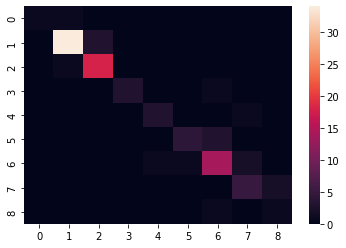

In [114]:
# make confusion table
confusion = confusion_matrix(y_test,y_pred_test)
print(confusion)

# make heatmap
sns.heatmap(confusion)

# display the plot
plt.show()